In [343]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import sql_func
sql_func.sql_start()

DBase connected!


In [344]:
def get_5(df,param):
    top5 = df.sort_values(by =[param],ascending=False).iloc[0:5]
    return top5

In [345]:
df_groups  = pd.read_sql_query("SELECT * from gru", sql_func.base)
df_search  = pd.read_sql_query("SELECT * from users_main", sql_func.base)
df_likes  = pd.read_sql_query("SELECT * from likes_comments", sql_func.base)
df_comments  = pd.read_sql_query("SELECT * from all_comments", sql_func.base)

Графики по постам/лайкам/комментариям/репостам

C:\Users\Roman Andreevich\AppData\Local\Temp\ipykernel_5052\2271406518.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp = df_groups.groupby(['year','month','group_id']).sum()


<AxesSubplot: xlabel='date', ylabel='Post_count'>

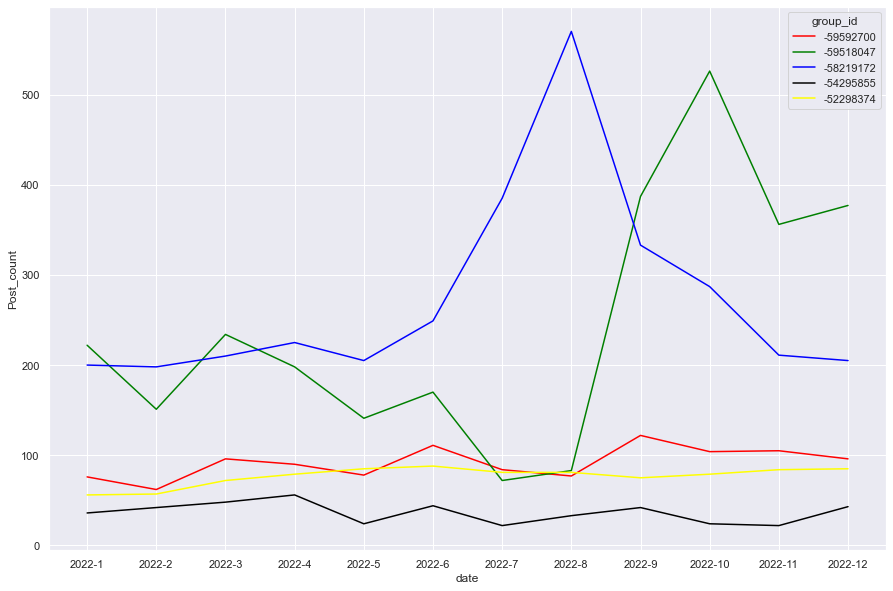

In [346]:
df_groups['date_of_post'] = pd.to_datetime(df_groups['date_of_post'])
df_groups['year'] = df_groups['date_of_post'].dt.year
df_groups['month'] = df_groups['date_of_post'].dt.month
df_temp = df_groups.groupby(['year','month','group_id']).sum()
df_temp['post_id'] = df_groups.groupby(['year','month','group_id']).count()['post_id']
df_temp.reset_index(inplace=True)
df_temp['date'] = df_temp['year']
for i in range(len(df_temp)):
    df_temp.iloc[i,8] = str(df_temp.iloc[i,0])+'-'+str(df_temp.iloc[i,1])
df_temp.rename({'post_id': 'Post_count'},axis =1,inplace=True)
plt.figure(figsize=(15, 10))
sns.set_theme(style='darkgrid')
cmap = ['red','green','blue','black','yellow']
sns.lineplot(data = df_temp[df_temp['year']==2022], x="date", y="Post_count", hue="group_id", palette=cmap)

<AxesSubplot: xlabel='date', ylabel='likes'>

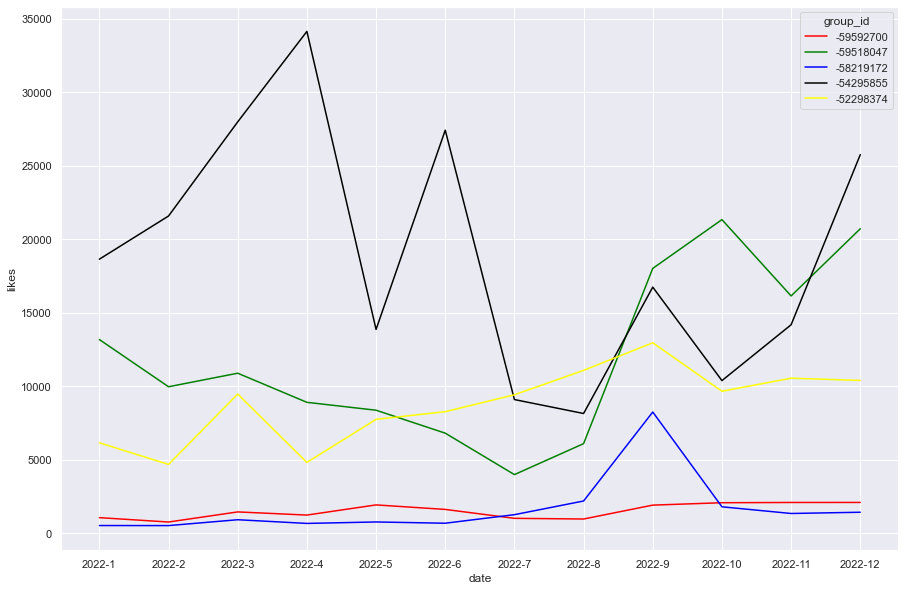

In [347]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = df_temp[df_temp['year']==2022], x="date", y="likes", hue="group_id", palette=cmap)

<AxesSubplot: xlabel='date', ylabel='comments'>

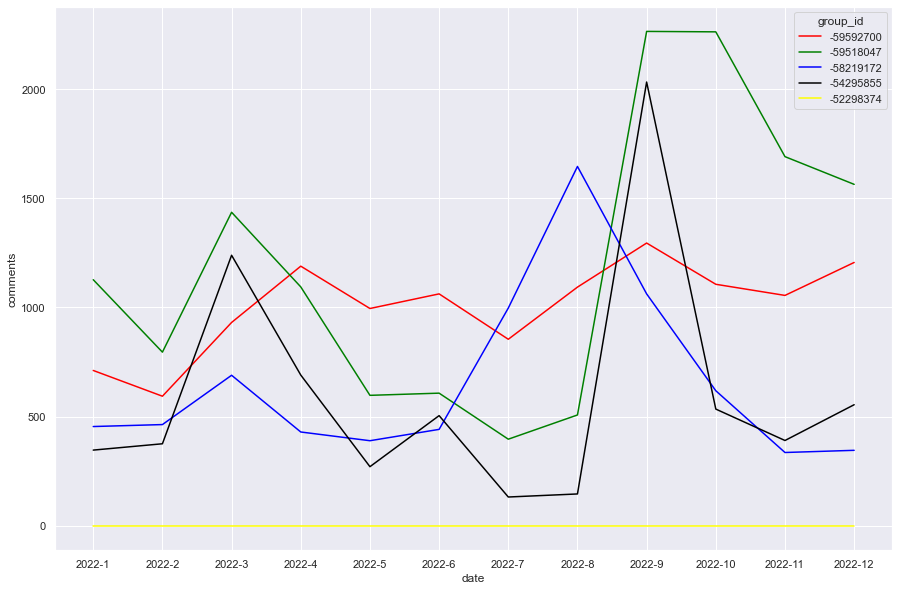

In [348]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = df_temp[df_temp['year']==2022], x="date", y="comments", hue="group_id", palette=cmap)

<AxesSubplot: xlabel='date', ylabel='reposts'>

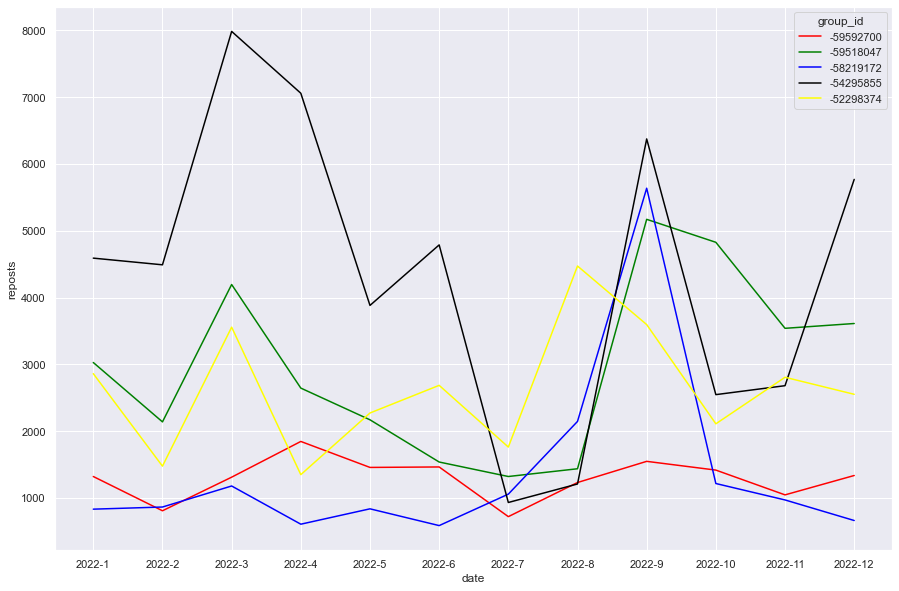

In [349]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = df_temp[df_temp['year']==2022], x="date", y="reposts", hue="group_id", palette=cmap)

In [350]:
df_temp1 = df_temp[df_temp['group_id']==-59518047]

Хитмап по лайкам в признавашках за все время

C:\Users\Roman Andreevich\AppData\Local\Temp\ipykernel_5052\3551739000.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df_temp1.pivot('month','year','likes'),annot=True,fmt='g',linewidths=.5)


<AxesSubplot: xlabel='year', ylabel='month'>

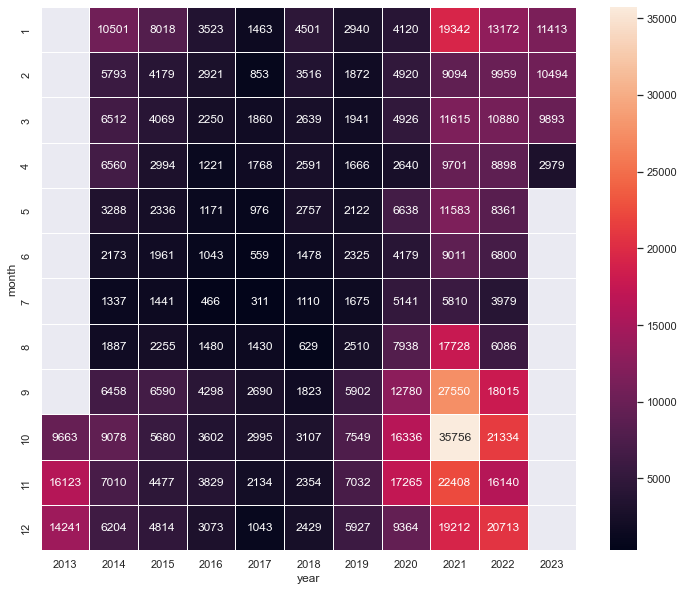

In [351]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_temp1.pivot('month','year','likes'),annot=True,fmt='g',linewidths=.5)

C:\Users\Roman Andreevich\AppData\Local\Temp\ipykernel_5052\812762590.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df_temp1.pivot('month','year','likes'),annot=True,fmt='g',linewidths=.5)


<AxesSubplot: xlabel='year', ylabel='month'>

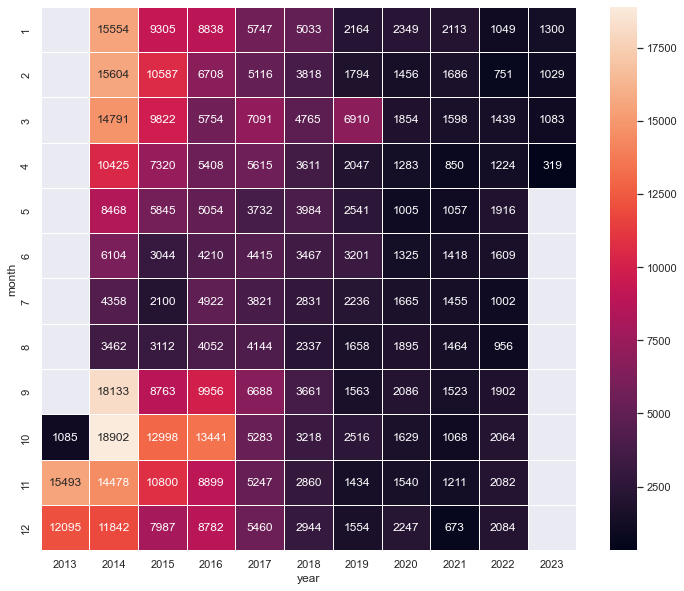

In [352]:
df_temp1 = df_temp[df_temp['group_id']==-59592700]
plt.figure(figsize=(12, 10))
sns.heatmap(df_temp1.pivot('month','year','likes'),annot=True,fmt='g',linewidths=.5)

In [353]:
str_to = 'vk.com/spbu_love?w=wall-59518047_'
df_temp = df_groups[df_groups['group_id']==-59518047]
top5 = get_5(df_temp,'likes')
top5

,post_id,user_id,date_of_post,likes,comments,reposts,text,group_id,year,month
38108,13581,-59518047,2013-11-23,3770,59,3,"Кто не поставит лайк, тот не сдаст сессию))0",-59518047,2013,11
4167,374641,-59518047,2021-11-09,1746,6,46,,-59518047,2021,11
4289,373373,-59518047,2021-10-28,1352,15,340,,-59518047,2021,10
4268,373497,-59518047,2021-10-29,1165,9,252,,-59518047,2021,10
6227,356087,-59518047,2020-11-19,1063,6,26,,-59518047,2020,11


Топ 5 постов по лайкам


In [354]:
for i in range(len(top5)):
    top5.iloc[i,0] = str_to+str(top5.iloc[i,0])
top5.iloc[:,0]

38108     vk.com/spbu_love?w=wall-59518047_13581
4167     vk.com/spbu_love?w=wall-59518047_374641
4289     vk.com/spbu_love?w=wall-59518047_373373
4268     vk.com/spbu_love?w=wall-59518047_373497
6227     vk.com/spbu_love?w=wall-59518047_356087
Name: post_id, dtype: object

In [355]:
df_temp = df_groups[df_groups['group_id']==-59518047]
top5 = get_5(df_temp,'comments')
top5

,post_id,user_id,date_of_post,likes,comments,reposts,text,group_id,year,month
35371,43498,-59518047,2014-02-03,91,6293,0,чей коммент будет последним тому 1000р+админка...,-59518047,2014,2
27275,134668,-59518047,2014-12-20,2,3283,0,"Это так глупо, честно, я понимаю. Но Мастер ищ...",-59518047,2014,12
38978,6437,-59518047,2013-11-04,17,742,0,Можно ли найти свою вторую половинку по музыка...,-59518047,2013,11
26202,151961,237948463,2015-01-24,21,438,1,"Накипело.\n\nНедавно видел тут пост, где девах...",-59518047,2015,1
21359,212162,-59518047,2015-11-03,1,368,0,#интерактив@spbu_love,-59518047,2015,11


Топ 5 постов по комментариям

In [356]:
for i in range(len(top5)):
    top5.iloc[i,0] = str_to+str(top5.iloc[i,0])
top5.iloc[:,0]

35371     vk.com/spbu_love?w=wall-59518047_43498
27275    vk.com/spbu_love?w=wall-59518047_134668
38978      vk.com/spbu_love?w=wall-59518047_6437
26202    vk.com/spbu_love?w=wall-59518047_151961
21359    vk.com/spbu_love?w=wall-59518047_212162
Name: post_id, dtype: object

Боксплот по количеству лайков пользователей

<AxesSubplot: >

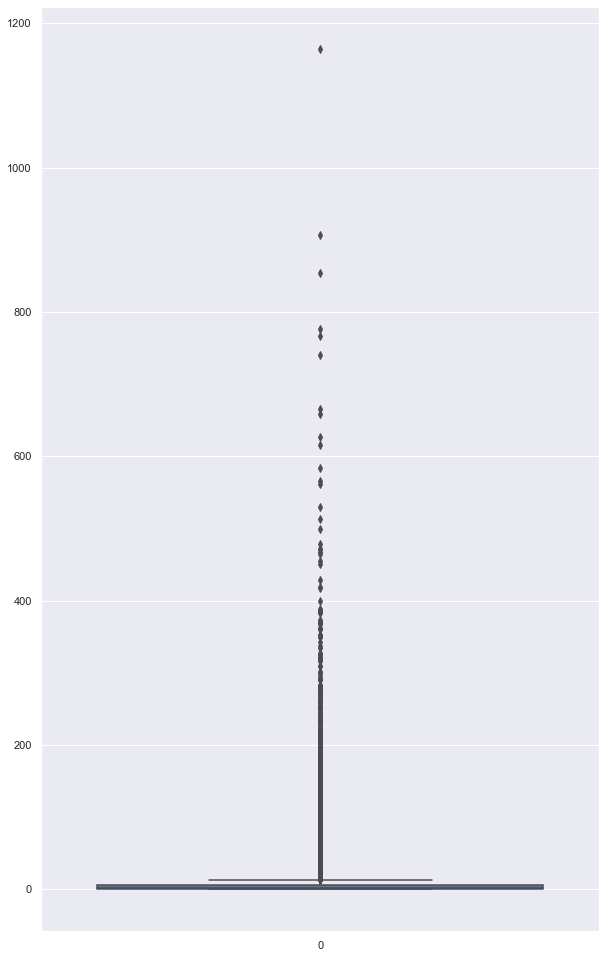

In [357]:
plt.figure(figsize=(10, 17))
sns.boxplot(df_likes['likes'])

Боксплот по комментариям

,user_id,likes,comments
count,5.660000e+03,5660.000000,5660.000000
mean,1.596326e+08,19.293286,8.537809
std,1.623360e+08,55.604940,35.849292
min,-2.158886e+08,0.000000,1.000000
25%,2.680322e+07,0.000000,1.000000
50%,1.201480e+08,3.000000,2.000000
75%,2.405825e+08,14.000000,5.000000
max,7.937220e+08,1164.000000,867.000000


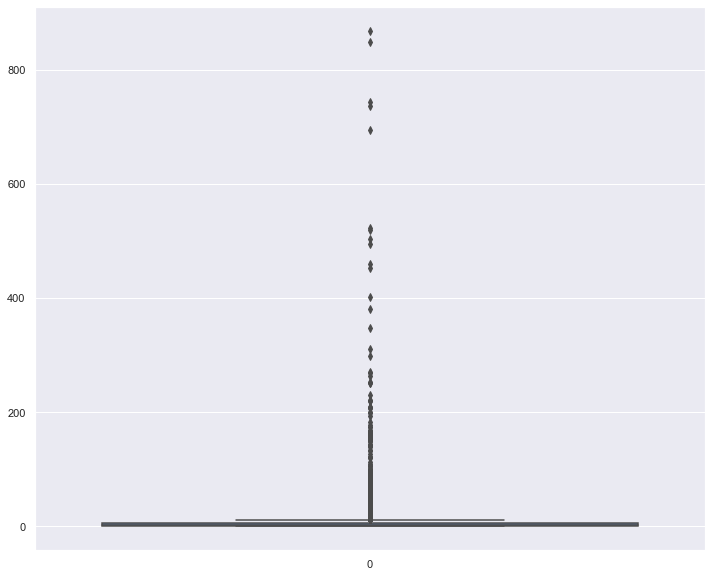

In [358]:
plt.figure(figsize=(12, 10))
sns.boxplot(df_likes['comments'][df_likes['comments']!=0])
df_likes[df_likes['comments']!=0].describe()

Топ 5 пользователей по количеству лайков

In [359]:
strr= 'vk.com/id'
top5 = get_5(df_likes,'likes')
for i in range(len(top5)):
    top5.iloc[i,0] = strr+str(top5.iloc[i,0])
top5

,user_id,likes,comments
2168,vk.com/id336828907,1164,2
278,vk.com/id343112395,907,5
322,vk.com/id445463021,854,15
572,vk.com/id219081839,777,3
267,vk.com/id161080978,766,7


Топ 5 пользователей по количеству комментариев

In [360]:
top5 = get_5(df_likes,'comments')
for i in range(len(top5)):
    top5.iloc[i,0] = strr+str(top5.iloc[i,0])
top5

,user_id,likes,comments
15808,vk.com/id71194,33,867
26501,vk.com/id35582250,0,848
14867,vk.com/id182920014,215,743
20426,vk.com/id2803126,37,736
17901,vk.com/id248081002,97,695


In [361]:
import ast

df_comments['date_of_comment'] = pd.to_datetime(df_comments['date_of_comment'])
df_comments = df_comments[df_comments['date_of_comment']>pd.to_datetime('2022-09-01')]
df_comments['year'] = df_comments['date_of_comment'].dt.year
df_comments['month'] = df_comments['date_of_comment'].dt.month
all_likes = []
for i in df_comments['likes_id']:
    all_likes.append(ast.literal_eval(i))
new_all=[]
for i in all_likes:
    for j in i:
        new_all.append(j)
new_all = np.array(new_all)
dic = dict.fromkeys(np.unique(new_all),0)
for i in new_all:
    dic[i]+=1
likes_by_comments =pd.Series(dic).reset_index()
likes_by_comments.rename({'index': 'user_id',0:'likes'},axis=1,inplace=True)



Топ 5 комментариев по лайкам

In [362]:
top5 = get_5(df_comments,'likes')
top5.drop(['text'],axis=1)


,comment_id,user_id,post_id,likes,date_of_comment,likes_id,year,month
5784,398845,352004717,398828,115,2022-11-23,"[35332141, 55765627, 57328353, 68632843, 73398...",2022,11
6253,398088,266417664,398087,104,2022-11-16,"[50357372, 50960935, 59296755, 65440364, 76778...",2022,11
5369,399580,235557530,399564,91,2022-11-29,"[4724117, 25954651, 34529084, 49600278, 504945...",2022,11
6755,397200,155671429,397194,85,2022-11-05,"[45159694, 71104869, 82647489, 85543625, 13896...",2022,11
1382,406619,225389209,406617,78,2023-03-05,"[45159694, 52362931, 59296755, 60120101, 68248...",2023,3


Топ 5 пользователей по количеству лайков комментариям

In [363]:
top5 = get_5(likes_by_comments,'likes')
top1 = top5.iloc[0,0]
for i in range(len(top5)):
    top5.iloc[i,0] = strr+str(top5.iloc[i,0])
top5

,user_id,likes
2160,vk.com/id272035623,1265
2850,vk.com/id352004717,424
3094,vk.com/id386092147,398
2647,vk.com/id325953991,353
2257,vk.com/id281665042,344


In [364]:
d=[]
for i in range(len(df_comments)):
    if top1 in all_likes[i]:
        d.append(i)


In [365]:
df_first = df_comments.iloc[d]

In [366]:
df_first['date_of_comment'] = pd.to_datetime(df_first['date_of_comment'])
df_first['year'] = df_first['date_of_comment'].dt.year
df_first['month'] = df_first['date_of_comment'].dt.month
df_first=df_first.groupby(['year','month']).count()['likes']

C:\Users\Roman Andreevich\AppData\Local\Temp\ipykernel_5052\2089357749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first['date_of_comment'] = pd.to_datetime(df_first['date_of_comment'])
C:\Users\Roman Andreevich\AppData\Local\Temp\ipykernel_5052\2089357749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first['year'] = df_first['date_of_comment'].dt.year
C:\Users\Roman Andreevich\AppData\Local\Temp\ipykernel_5052\2089357749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

In [367]:
df_first=df_first.reset_index()
df_first['date'] = df_first['year']
for i in range(len(df_first)):
    df_first.iloc[i,3] = str(df_first.iloc[i,0])+'-'+str(df_first.iloc[i,1])

График лайков по месяцам пользователя с наибольшим количеством лайков

<AxesSubplot: xlabel='date', ylabel='likes'>

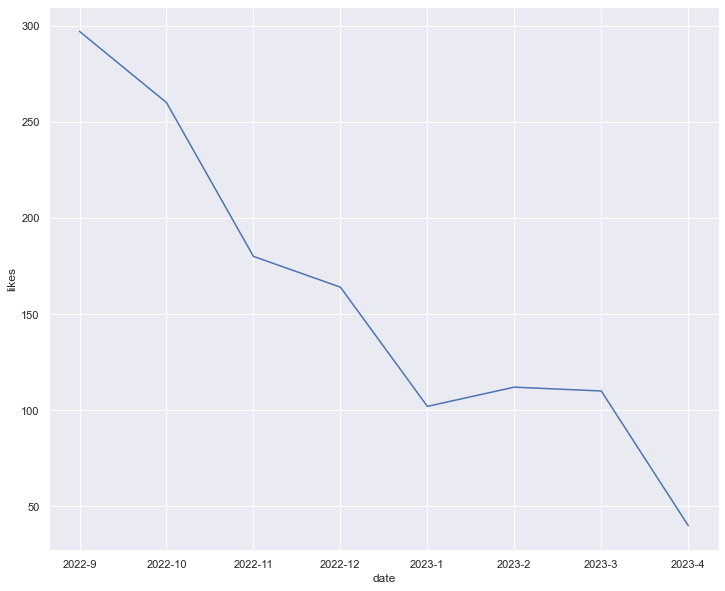

In [368]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(12, 10))
sns.lineplot(data = df_first,x='date',y='likes')

In [369]:
df_search  = pd.read_sql_query("SELECT * from users_main", sql_func.base)
df_search

,post_id,user_id,date_of_post,likes,comments,reposts,text
0,4838,-17047681,2023-04-13,1,0,2,Центр Мониторинга Качества Образования (ЦМКО) ...
1,5543,-46331614,2023-04-13,2,2,7,📚СДАЧА УЧЕБНИКОВ В БИБЛИОТЕКУ \n \nДорогие обу...
2,4642,-108932908,2023-04-12,2,0,2,🔥 Санкт-Петербургские студенческие соревновани...
3,765,-10078572,2023-04-12,0,0,0,#интересноемед@spbu_medcollege
4,11177,-2411,2023-04-12,18,0,6,Наша студентка магистратуры Надежда Юткина (пр...
...,...,...,...,...,...,...,...
845,381302,-58219172,2023-04-15,0,1,2,"Доброго дня! Я сейчас в 10 классе, рассматрива..."
846,2425,134949334,2023-04-15,21,4,1,Друзья!😊\nМеня зовут Аида Эльканова.\nЯ живу в...
847,7006,460899209,2023-04-15,5,0,0,"Профессор Межевич рассказал, как Россия на зак..."
848,74344,-55386200,2023-04-15,7,0,1,Чудные питерские дворы\n\n1. Мозаичный дворик....


C:\Users\Roman Andreevich\AppData\Local\Temp\ipykernel_5052\3579043910.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp = df_search.groupby(['date_of_post']).sum()


,date_of_post,Post_count,user_id,likes,comments,reposts
0,2023-04-12,141,-10411593273,2860,134,844
1,2023-04-13,206,-9532561274,1978,88,437
2,2023-04-14,173,-9941936065,748,43,188
3,2023-04-15,139,-6202637359,855,62,157


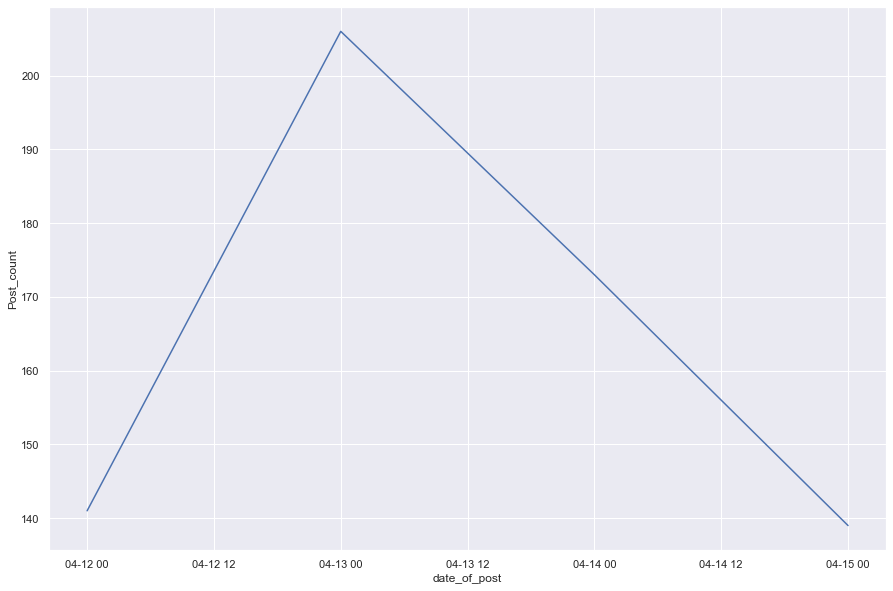

In [370]:
df_search['date_of_post'] = pd.to_datetime(df_search['date_of_post'])
df_search =df_search[df_search['date_of_post']>pd.to_datetime('2023-04-11')]
df_temp = df_search.groupby(['date_of_post']).sum()
df_temp['post_id'] = df_search.groupby(['date_of_post']).count()['post_id']
df_temp.reset_index(inplace=True)
df_temp.rename({'post_id': 'Post_count'},axis =1,inplace=True)
plt.figure(figsize=(15, 10))
sns.set_theme(style='darkgrid')
sns.lineplot(data = df_temp, x="date_of_post", y="Post_count")
df_temp

In [371]:
len(df_search.user_id.unique())

534

In [372]:
df_search[df_search['user_id']>0].groupby(['user_id']).count().sort_values(by=['post_id'],ascending=False)['post_id']

user_id
27323654     2
159142080    2
8518677      2
83992530     2
739496570    2
            ..
9795622      1
7649190      1
7177933      1
6162852      1
785579064    1
Name: post_id, Length: 118, dtype: int64

In [373]:
df_search[df_search['user_id']<0].groupby(['user_id']).count().sort_values(by=['post_id'],ascending=False)['post_id']

user_id
-50260527     15
-135212633     9
-58219172      6
-168           6
-203742612     5
              ..
-189251017     1
-189507809     1
-190053784     1
-190320587     1
-140039075     1
Name: post_id, Length: 416, dtype: int64

In [374]:
uniq_per_day=[]
uniq_person=[]
uniq_club=[]
for i in df_temp['date_of_post']:
    dff = df_search[df_search['date_of_post']==i]
    uniq_per_day.append(dff.user_id.unique())
    uniq_person.append(dff[dff['user_id']>0].user_id.unique())
    uniq_club.append(dff[dff['user_id']<0].user_id.unique())



In [375]:
df_temp1 = df_temp
df_temp1['uniq'] = [len(x) for x in uniq_per_day]
df_temp1['uniq_person'] = [len(x) for x in uniq_person]
df_temp1['uniq_club'] = [len(x) for x in uniq_club]
df_temp1


,date_of_post,Post_count,user_id,likes,comments,reposts,uniq,uniq_person,uniq_club
0,2023-04-12,141,-10411593273,2860,134,844,131,21,110
1,2023-04-13,206,-9532561274,1978,88,437,186,35,151
2,2023-04-14,173,-9941936065,748,43,188,157,30,127
3,2023-04-15,139,-6202637359,855,62,157,128,35,93


<AxesSubplot: title={'center': 'Unique users and groups per day '}, xlabel='Day', ylabel='Uniq users'>

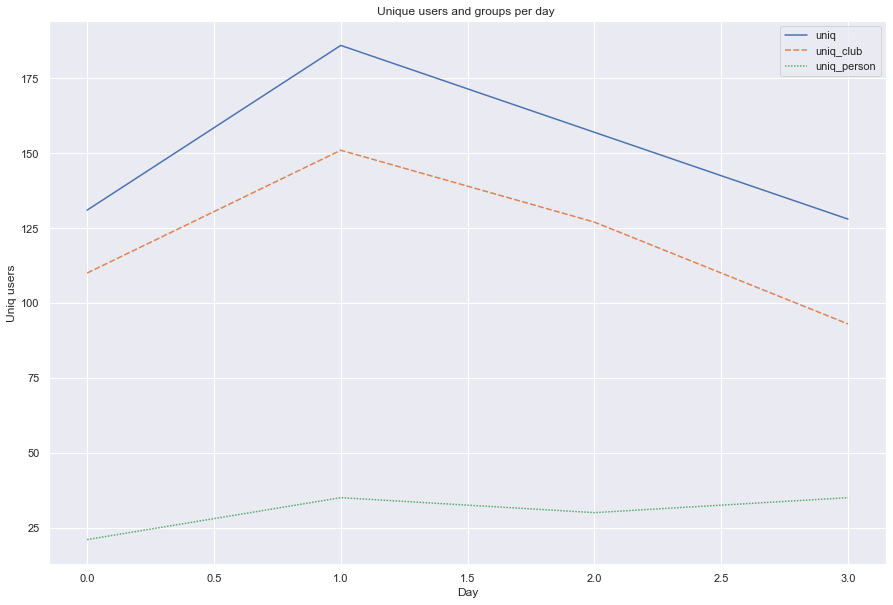

In [376]:
plt.figure(figsize=(15, 10))
sns.set_theme(style='darkgrid')
ax=sns.lineplot(data = df_temp1[['date_of_post','uniq','uniq_club','uniq_person']])
ax.set (xlabel='Day',
 ylabel='Uniq users',
 title='Unique users and groups per day ')
ax